In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm

In [ ]:
train = pd.read_csv('..\\dataset\\train.csv')
test = pd.read_csv('..\\dataset\\test.csv')
sample_submission = pd.read_csv('..\\dataset\\sample_submission.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


train data로 모델을 학습해서  test의 credit을 예측

In [ ]:
data = pd.concat([train, test], axis = 0)

In [ ]:
data.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       11323
family_size          0
begin_month          0
credit           10000
dtype: int64

In [ ]:
train['credit'].isnull().sum()

0

In [ ]:
data = data.drop("occyp_type", axis = 1)

In [ ]:
data.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
family_size          0
begin_month          0
credit           10000
dtype: int64

In [ ]:
len(data['gender'].unique())

2

In [ ]:
unique_len = data.apply(lambda x : len(x.unique()))

In [ ]:
group_1 = unique_len[unique_len <= 2].index
group_1

Index(['gender', 'car', 'reality', 'FLAG_MOBIL', 'work_phone', 'phone',
       'email'],
      dtype='object')

In [ ]:
group_2 = unique_len[(unique_len > 2)&(unique_len <= 10)].index
group_2

Index(['child_num', 'income_type', 'edu_type', 'family_type', 'house_type',
       'family_size', 'credit'],
      dtype='object')

In [ ]:
group_3 = unique_len[unique_len > 10].index
group_3

Index(['index', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month'], dtype='object')

In [ ]:
data[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,F,N,N,1,0,0,0
1,F,N,Y,1,0,0,1
2,M,Y,Y,1,0,1,0
3,F,N,Y,1,0,1,0
4,F,Y,Y,1,0,0,0
...,...,...,...,...,...,...,...
9995,F,Y,Y,1,1,1,0
9996,M,Y,Y,1,1,0,0
9997,F,N,Y,1,0,0,0
9998,F,Y,N,1,0,1,0


In [ ]:
data['gender'] = data['gender'].replace(['F','M'], [0, 1])
data['car'] = data['car'].replace(['N','Y'], [0, 1])
data['reality'] = data['reality'].replace(['N','Y'], [0, 1])

In [ ]:
data[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,1
2,1,1,1,1,0,1,0
3,0,0,1,1,0,1,0
4,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...
9995,0,1,1,1,1,1,0
9996,1,1,1,1,1,0,0
9997,0,0,1,1,0,0,0
9998,0,1,0,1,0,1,0


### group 2

In [ ]:
data[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,Commercial associate,Higher education,Married,Municipal apartment,2.0,1.0
1,1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,3.0,1.0
2,0,Working,Higher education,Married,House / apartment,2.0,2.0
3,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,0.0
4,0,State servant,Higher education,Married,House / apartment,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,Working,Incomplete higher,Married,House / apartment,2.0,NaN
9996,0,Working,Secondary / secondary special,Civil marriage,House / apartment,2.0,NaN
9997,0,Working,Secondary / secondary special,Married,House / apartment,2.0,NaN
9998,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,NaN


<AxesSubplot:>

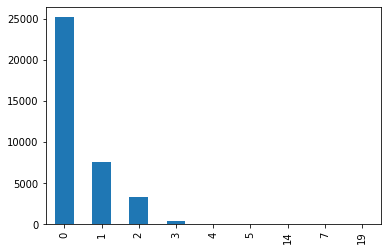

In [ ]:
data['child_num'].value_counts().plot.bar()

In [ ]:
data.loc[data['child_num']>2, 'child_num'] = 2

<AxesSubplot:>

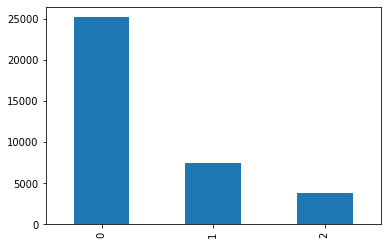

In [ ]:
data['child_num'].value_counts().plot.bar()

In [ ]:
data[group_2].apply(lambda x : len(x.unique()))

child_num       3
income_type     5
edu_type        5
family_type     5
house_type      6
family_size    10
credit          4
dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
data['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [ ]:
data['income_type'] = label_encoder.fit_transform(data['income_type'])
data['income_type'].unique()

array([0, 4, 2, 1, 3])

In [ ]:
data['edu_type'] = label_encoder.fit_transform(data['edu_type'])
data['edu_type'].unique()

array([1, 4, 2, 3, 0])

In [ ]:
data['family_type'] = label_encoder.fit_transform(data['family_type'])
data['family_type'].unique()

array([1, 0, 2, 3, 4])

In [ ]:
data['house_type'] = label_encoder.fit_transform(data['house_type'])
data['house_type'].unique()

array([2, 1, 5, 0, 4, 3])

In [ ]:
data[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,0,1,1,2,2.0,1.0
1,1,0,4,0,1,3.0,1.0
2,0,4,1,1,1,2.0,2.0
3,0,0,4,1,1,2.0,0.0
4,0,2,1,1,1,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,4,2,1,1,2.0,NaN
9996,0,4,4,0,1,2.0,NaN
9997,0,4,4,1,1,2.0,NaN
9998,0,0,4,1,1,2.0,NaN


## group3

In [ ]:
data[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,202500.0,-13899,-4709,-6.0
1,1,247500.0,-11380,-1540,-5.0
2,2,450000.0,-19087,-4434,-22.0
3,3,202500.0,-15088,-2092,-37.0
4,4,157500.0,-15037,-2105,-26.0
...,...,...,...,...,...
9995,36452,202500.0,-18593,-5434,-19.0
9996,36453,202500.0,-10886,-1315,-34.0
9997,36454,292500.0,-21016,-14018,-55.0
9998,36455,180000.0,-16541,-1085,-33.0


In [ ]:
data['income_total'].min()

27000.0

In [ ]:
data['income_total'].max()

1575000.0

In [ ]:
len(data['income_total'].unique())

265

In [ ]:
counts, bin_dividers = np.histogram(data['income_total'], bins = 7)

In [ ]:
data['income_total']

0       202500.0
1       247500.0
2       450000.0
3       202500.0
4       157500.0
          ...   
9995    202500.0
9996    202500.0
9997    292500.0
9998    180000.0
9999    270000.0
Name: income_total, Length: 36457, dtype: float64

In [ ]:
data['income_total'] = pd.factorize(pd.cut(data['income_total'], bins = bin_dividers, include_lowest = True, labels = np.arange(7)))[0]

In [ ]:
data['income_total']

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: income_total, Length: 36457, dtype: int64

In [ ]:
data['DAYS_BIRTH']

0      -13899
1      -11380
2      -19087
3      -15088
4      -15037
        ...  
9995   -18593
9996   -10886
9997   -21016
9998   -16541
9999    -9154
Name: DAYS_BIRTH, Length: 36457, dtype: int64

In [ ]:
def make_bin(array, n):
    array = -array
    _, bin_dividers = np.histogram(array, bins = n)
    cut_categories = pd.cut(array, bin_dividers, labels = np.arange(n), include_lowest = True)
    bined_array = pd.factorize(cut_categories)[0]
    return bined_array

In [ ]:
pd.Series(make_bin(data['DAYS_BIRTH'], 10)).value_counts()

0    5177
3    5015
1    4922
5    4248
4    4063
2    3934
8    3713
6    3252
9    1252
7     881
dtype: int64

In [ ]:
data['DAYS_BIRTH'] = make_bin(data['DAYS_BIRTH'], 10)
data['DAYS_EMPLOYED'] = make_bin(data['DAYS_EMPLOYED'], 6)
data['begin_month'] = make_bin(data['begin_month'], 4)

In [ ]:
data[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,0,0,0,0
1,1,0,1,0,0
2,2,1,2,0,1
3,3,0,3,0,2
4,4,0,3,0,1
...,...,...,...,...,...
9995,36452,0,2,0,1
9996,36453,0,5,0,2
9997,36454,1,8,0,3
9998,36455,0,4,0,2


## data train/test로 다시 나누기

In [ ]:
print(train.shape,test.shape)

(26457, 20) (10000, 19)


In [ ]:
train = data[:-10000];len(train)

26457

In [ ]:
test = data[-10000:];len(test)

10000

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,0,0,1,1,2,0,0,1,0,0,0,2.0,0,1.0
1,1,0,0,1,1,0,0,4,0,1,1,0,1,0,0,1,3.0,0,1.0
2,2,1,1,1,0,1,4,1,1,1,2,0,1,0,1,0,2.0,1,2.0
3,3,0,0,1,0,0,0,4,1,1,3,0,1,0,1,0,2.0,2,0.0
4,4,0,1,1,0,0,2,1,1,1,3,0,1,0,0,0,2.0,1,2.0


In [ ]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,26457,1,1,0,0,0,1,4,0,1,6,1,1,0,1,0,2.0,3,NaN
1,26458,0,0,1,0,0,2,1,1,1,2,0,1,0,1,0,2.0,2,NaN
2,26459,0,0,1,0,0,4,4,1,1,3,0,1,1,1,0,2.0,2,NaN
3,26460,1,1,0,0,0,0,4,1,1,2,0,1,1,0,0,2.0,2,NaN
4,26461,0,1,1,0,0,2,1,1,1,4,0,1,1,0,0,2.0,0,NaN


## train_x, train_y, test_x로 나누기

In [ ]:
train_x = train.drop('credit', axis = 1);train_x.shape

(26457, 18)

In [ ]:
train_y = train['credit'];train_y.shape

(26457,)

In [ ]:
test_x = test.drop('credit', axis = 1);test_x.shape

(10000, 18)

In [ ]:
train_x.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,0,0,0,0,0,0,0,1,1,2,0,0,1,0,0,0,2.0,0
1,1,0,0,1,1,0,0,4,0,1,1,0,1,0,0,1,3.0,0
2,2,1,1,1,0,1,4,1,1,1,2,0,1,0,1,0,2.0,1
3,3,0,0,1,0,0,0,4,1,1,3,0,1,0,1,0,2.0,2
4,4,0,1,1,0,0,2,1,1,1,3,0,1,0,0,0,2.0,1


In [ ]:
train_y

0        1.0
1        1.0
2        2.0
3        0.0
4        2.0
        ... 
26452    1.0
26453    2.0
26454    2.0
26455    2.0
26456    2.0
Name: credit, Length: 26457, dtype: float64

In [ ]:
test_x

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,26457,1,1,0,0,0,1,4,0,1,6,1,1,0,1,0,2.0,3
1,26458,0,0,1,0,0,2,1,1,1,2,0,1,0,1,0,2.0,2
2,26459,0,0,1,0,0,4,4,1,1,3,0,1,1,1,0,2.0,2
3,26460,1,1,0,0,0,0,4,1,1,2,0,1,1,0,0,2.0,2
4,26461,0,1,1,0,0,2,1,1,1,4,0,1,1,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,0,4,2,1,1,2,0,1,1,1,0,2.0,1
9996,36453,1,1,1,0,0,4,4,0,1,5,0,1,1,0,0,2.0,2
9997,36454,0,0,1,0,1,4,4,1,1,8,0,1,0,0,0,2.0,3
9998,36455,0,1,0,0,0,0,4,1,1,4,0,1,0,1,0,2.0,2


## 1. RandomForest

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, stratify = train_y, test_size = 0.25, random_state = 33)
print(X_train.shape,X_val.shape, y_train.shape, y_val.shape)

(19842, 18) (6615, 18) (19842,) (6615,)


In [ ]:
clf = RandomForestClassifier(random_state=10086)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=10086)

In [ ]:
## validation 데이터 예측값( test 예측값은 아님-착각말자)
y_proba = clf.predict_proba(X_val)
y_val_onehot = pd.get_dummies(y_val);y_val_onehot.head()

,0.0,1.0,2.0
12331,0,1,0
572,0,0,1
6950,0,0,1
12409,0,1,0
11471,0,0,1


In [ ]:
print('log_loss :' , log_loss(y_val_onehot,y_proba))
np.argmax(y_proba, axis =1)[:10]

log_loss : 1.0442396811518921


array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1], dtype=int64)

### 답안 제출

In [ ]:
clf.predict_proba(test_x)

array([[0.05, 0.2 , 0.75],
       [0.09, 0.34, 0.57],
       [0.05, 0.23, 0.72],
       ...,
       [0.19, 0.25, 0.56],
       [0.16, 0.29, 0.55],
       [0.15, 0.34, 0.51]])

In [ ]:
sample_submission.iloc[:,1:] = clf.predict_proba(test_x);sample_submission

,index,0,1,2
0,26457,0.05,0.20,0.75
1,26458,0.09,0.34,0.57
2,26459,0.05,0.23,0.72
3,26460,0.18,0.24,0.58
4,26461,0.09,0.40,0.51
...,...,...,...,...
9995,36452,0.07,0.44,0.49
9996,36453,0.10,0.31,0.59
9997,36454,0.19,0.25,0.56
9998,36455,0.16,0.29,0.55
